<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cocl.us/corsera_da0101en_notebook_top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>


<a href="https://www.bigdatauniversity.com"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width = 300, align = "center"></a>

<h1 align=center><font size=5>Análisis de Datos con Python</font></h1>


<h1>Modulo 4: Desarrollo del Modelo</h1>


<p>En esta sección, desarrollaremos algunos modelos que predecirán el precio de un coche utilizando variables o caracteristicas. Esto es solo una estimación pero debería darnos una idea objetiva de cuanto costaría un coche.</p>


Algunas preguntas que queremos hacer en este módulo

<ul>
    <li>¿Sabré si el vendedor ofrece un valor justo por mi compra?</li>
    <li>¿Sabré si doy un valor justo por mi coche?</li>
</ul>
<p>Análisis de Datos, en ocasiones usamos el <b>Desarrollo del Modelo</b> para ayudar a predecir observaciones mediante los datos que tenemos.</p>

<p>Un modelo nos ayudará a entender la relación exacta entre distintas variables y como estas se utilizan para predecir el resultado.</p>


<h4>Configuración</h4>


 Importar librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos y los guardamos en un dataframe:


Este conjunto de datos fue almacenado como un objeto en IBM Cloud, haz clic <a href="https://cocl.us/DA101EN_object_storage">AQUI</a> para almacenar gratuitamente.


In [2]:
# ruta de los datos
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Regresión Lineal Simple y Multiple</h3>


<h4>Regresión Lineal Simple</h4>


<p>Un ejemplo de modelo de datos que se usará es</p>
<b>Regresión Lineal Simple</b>.

<br>
<p>La regresión lineal simple es un método que ayuda a entender la relación entre dos variables:</p>
<ul>
    <li>La variable predictora/independiente (X)</li>
    <li>La variable de respuesta/dependiente (la que queremos predecir) (Y)</li>
</ul>

<p> El resultado de la regresión lineal es una <b>función lineal</b> que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente).</p>


$$
 Y: Variable \\ de Respuesta\\
 X: Variable \\ Predictora
$$


 <b>Función Lineal:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a indica la <b>intercepción</b> de la línea de regresión, en otras palabras: el valor de Y cuando X es 0 </li>
    <li>b indica la <b>pendiente</b> de la línea de regresión, en otras palabras: el valor en el cual Y cambia cuando X se incremente en una unidad </li>
</ul>


<h4>Vamos a cargar los modulos para la regresión lineal</h4>


In [3]:
from sklearn.linear_model import LinearRegression

<h4>Crear el objeto de regresión lineal</h4>


In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h4>¿Como podria la variable Highway-mpg ayudarnos a predecir el precio del coche?</h4>


En este ejemplo queremos mirar como highway-mpg puede ayudar a predecir el precio del coche.
Usando la regresión lineal simple crearemos una función lienal con "highway-mpg" como variable predictora y "price" como variable de respuesta.


In [5]:
X = df[['highway-mpg']]
Y = df['price']

Usamos highway-mpg en el modelo.


In [6]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 Podemos mostrar una predicción


In [7]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>¿Cual es el valor de la intercepción (a)?</h4>


In [8]:
lm.intercept_

38423.3058581574

<h4>¿Cual es el valor de la pendiente (b)?</h4>


In [9]:
lm.coef_

array([-821.73337832])

<h3>¿Cual es el modelo lineal estimado que obtenemos?</h3>


Como se muestra arriba, deberíamos obtener un modelo lineal con la estructura:


$$
Yhat = a + b  X
$$


Sustituyendo los valores actuales obtenemos:


<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #1 a): </h1>
<b>Crear un objeto de regresión lineal</b>    
</div>


In [10]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
from sklearn.linear_model import LinearRegression
lm_prueba = LinearRegression()
lm_prueba

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

lm1 = LinearRegression()
lm1 

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta #1 b): </h1>

<b>Entrene el modelo utilizando 'engine-size' como variable independiente y 'price' como dependiente</b>

</div>


In [12]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
XX = df[['engine-size']]
YY = df['price']
lm_prueba.fit(XX,YY)
lm_prueba

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

lm1.fit(df[['highway-mpg']], df[['price']])
lm1

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #1 c):</h1>

<b>Encuentre la pendiente y la intercepción del modelo</b>    

</div>


<h4>Pendiente</h4>


In [13]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
lm_prueba.intercept_

-7963.338906281042

<h4>Intercepción</h4>


In [14]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
lm_prueba.coef_

array([166.86001569])

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# Slope 
lm1.coef_
# Intercept
lm1.intercept_

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #1 d): </h1>

<b>¿Cual es la ecuación de la recta? Puede usar x y yhat o 'engine-size' o 'price'</b>    

</div>


# Escriba su respuesta aquí


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

-->


<h4>Regresión Lineal Múltiple</h4>


<p>¿Que necesitamos para predecir el precio de un coche usando mas de una variable?</p>

<p>Si queremos usar mas variables en el modelo para predecir el precio podemos usar la <b>Regresión Lineal Multiple</b>.
La Regresión Lineal Multiple es parecida a la Simple pero este método es usado para explicar la relación entre una variable de respuesta continua (dependiente) y <b>dos o mas</b> variables predictoras (independiente).
La mayoría de los actuales modelos de regresión involucran multiples predictores. Se ilustrará la estructura utilizando cuatro varaibles predictoras pero estos resultados pueden aplicarse a cualquier entero:</p>


$$
Y: Variable \\ de\\ Respuesta\\
X_1: Variable\\ Predictora \\ 1\\
X_2: Variable\\ Predictora \\ 2\\
X_3: Variable\\ Predictora \\ 3\\
X_4: Variable\\ Predictora \\ 4\\
$$


$$
a: intercepción\\
b_1: coeficientes \\ de\\ la\\ Variable \\ 1\\
b_2: coeficientes \\ de\\ la\\ Variable \\ 2\\
b_3: coeficientes \\ de\\ la\\ Variable \\ 3\\
b_4: coeficientes \\ de\\ la\\ Variable \\ 4\\
$$


La ecuación esta dada por 


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>Sabemos por la sección anterior que otros buenos predictores del precio pueden ser:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Desarrollemos un modelo utilizando estas variables como predictoras.


In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Ajuste el modelo lineal utilizando las cuatro variables mencionadas arriba.


In [16]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

¿Cual es el valor de la intercepción (a)?


In [17]:
lm.intercept_

-15806.62462632922

¿Cuales son los valores de los coeficientes (b1, b2, b3, b4)?


In [18]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

¿Cual es el modelo lineal estimado que obtenemos?


Como se vio arriba deberíamos obtener una función lineal con la siguiente estructura:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

¿Cual es la función lineal que obtenermos en este ejemplo?


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #2 a): </h1>
Cree y entrene un modelo de Regresión Lineal Multiple "lm2" donde la variable de respuesta sea el "price" y las predictoras "normalized-losses' y 'highway-mpg". 
</div>


In [21]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
ZZ = df[['normalized-losses', 'highway-mpg']]
lm_prueba2 = LinearRegression()
lm_prueba2.fit(ZZ,df[['price']])
lm_prueba2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta  #2 b): </h1>
<b>Encuentre el coeficiente del modelo</b>
</div>


In [22]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
lm_prueba2.coef_

array([[   1.49789586, -820.45434016]])

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

lm2.coef_

-->


<h3>2) Evaluación del Modelo con Visualización</h3>


Ahora que hemos desarrollado algunos modelos, ¿Como los evaluamos y como elegimos el mejor? Una forma de hacerlo es mediante el uso de la viualización.


importar el paquete de visualización: seaborn


In [23]:
# importar el paquete de visualización: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Gráfica de Regresión</h3>


<p>Cuando se trata de regresión lineal simple, una excelente forma de visualizar el ajuste del modelo es utilizando <b>gráficas de regresión</b>.</p>

<p>Esta gráfica mostrará una combinación de puntos dispersos (una <b>gráfica de dispersión</b>) asi como la recta de <b>regresión lineal</b> a traves de los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación asi como la dirección (positiva o negativa).</p>


 Visualicemos "Horsepower" como una posible variable predictora del precio:


(0.0, 48247.081639202166)

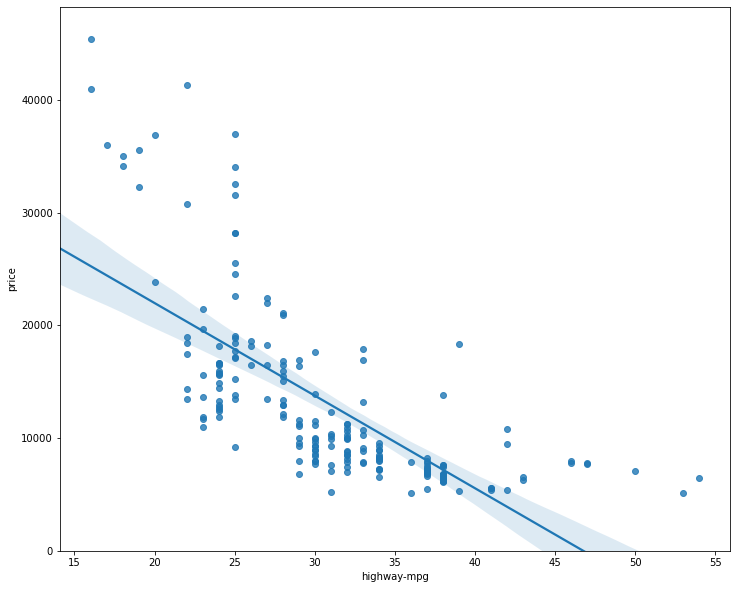

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Podemos ver en esta gráfica que "price" esta correlacionada negativamente con "highway-mpg" debido a que la pendiente de regresión es negativa.
Algo que tener en cuenta cuando se mire la gráfica es poner atención en que tan esparcidos estas los datos alrededor de la recta. Esto le dará una buena indicación de la variación en los datos y si el modelo se ajustara bien o no. Si los datos estan muy lejos de la recta este modelo pudiera no ser el mejor para este conjunto de datos. Comparemos esta gráfica con la de "peak-rpm".</p>


(0.0, 47414.1)

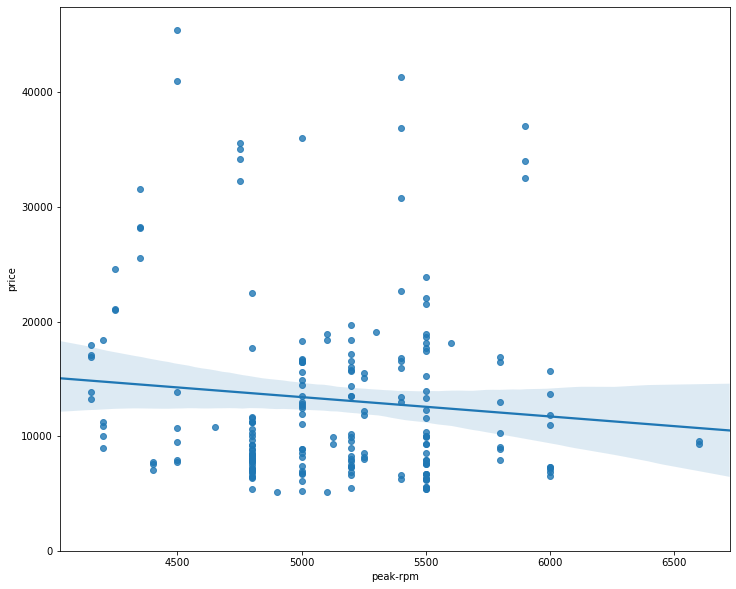

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Al comparar la gráfica de "peak-rpm" y "highway-mpg" podemos ver que los puntos para el segundo estan mas cerca de la recta generada y el decrecimeinto promedio. Lo puntos de "peak-rpm" estan mas separados en torno a la recta y es mas dificil determinar si los puntos estan decreciendo o incrementando cuando "highway-mpg" crece.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #3:</h1>
<b>Dada la gráfica de regresión anterior, ¿Esta "peak-rpm" o "highway-mpg" fuertemente correlacionada con "price"? Utilice el método ".corr()" para verficar su respuesta.</b>    
    
</div>


In [26]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to   "peak-rpm" which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()

-->


<h3>Gráfica Residual</h3>

<p>Una buena manera de ver la varianza en los datos es utilizando un gráfica residual</p>

<p>¿Que es un <b>residuo</b></p>

<p>La diferencia entre el valor observado (y) y el valor predecido (Yhat) es llamado residuo (e). Cuando observamos una gráfica de regresión, el residual es la distancia desde el punto dado por el dato hasta la recta de regresión.</p>

<p>Entoces ¿Que es una <b>gráfica residual</b>?</p>

<p>Es aquella que muestra los residuos en el eje vertical y la variable independiente en el eje horizontal x.</p>

<p>¿En que debe fijarse cuando observe una gráfica residual?</p>

<p>Observaremos la dispersion de los residuos:</p>

<p>Si los puntos en la gráfica residual estan <b>esparcidos al azar alrededor del eje x</b> entonces un <b>modelo lineal es apropiado</b> para los datos. ¿Por que? Los residuales esparcidos al azar significa que la varianza es constante y entonces el modelo se ajusta bien a los datos. </p>


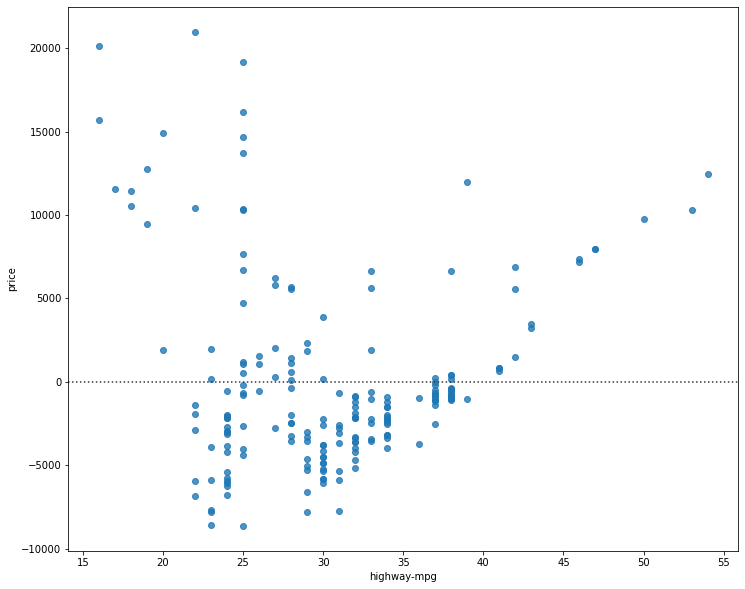

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>¿Que nos indica la gráfica?</i>

<p>Podemos observar en la gráfica que los residuales no estan esparcidos al azar alrededor del eje x lo cual nos lleva a pensar que quiza un modelo no lineal es mas apropiado para los datos.</p>


<h3>Regresión Lineal Multiple</h3>


<p>¿Como visualizamos un modelo para una Regresión Lineal Multiple? Es un poco mas complicado debido a que no se puede visualizar con gráficas de regresión o residuales.</p>

<p>Una forma de ver el ajuste del modelo es con la <b>gráfica de distribución</b>: Podemos observar la distribución de los valores ajustados que resulta del modelo y compararlo con la distribución de los valores actuales.</p>


Hagamos primero una predicción


In [ ]:
Y_hat = lm.predict(Z)

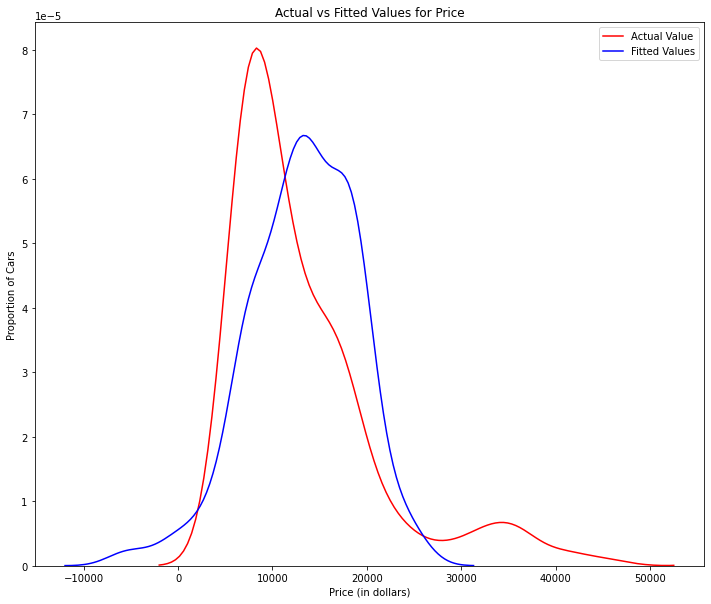

In [28]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Podemos observar que los valores ajustados estan razonablemente cerca a los actuales debido a que las dos distribuciones ser solapan un poco. Sin embargo, hay espacio para mejorarlo.</p>


<h2>Parte 3: Regresión Polinomial y Pipelines</h2>


<p>La <b>regresión polinomial</b> es un caso particular de modelo general de regresión lineal o multiple.</p>
<p>Obtenemos las relaciones no lineales al elevar al cuadrado o potencias mayores las variables predictoras.</p>

<p>Existen distintas magnitudes de regresión polinomial:</p>


<center><b>Cuadraticas - 2 orden</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$

<center><b>Cubicas - 3 orden</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$

<center><b>Ordenes mayores</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$


<p>Vimos anteriormente que un modelo lineal no ofrece el mejor ajuste utilizando "highway-mpg" como la variable predictora. Veamos si podemos ajustar un modelo polinomial a los datos.</p>


<p>Usaremos la siguiente función para graficar los datos:</p>


In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Obtengamos las variables


In [30]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función <b>polyfit</b> y despues la función <b>polyld</b> para mostrar la función polinomial.


In [31]:
# Utilizamos un polinomio de tercera magnitud (cubico)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Mostremos la función


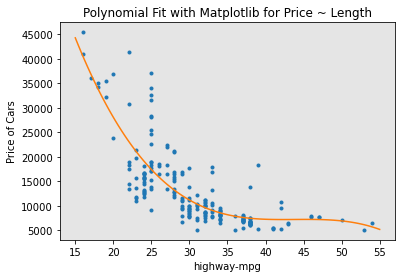

In [32]:
PlotPolly(p, x, y, 'highway-mpg')

In [33]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>Ahora podemos ver con la grafica que este modelo polinomico se desempeña mejor que el modelo lineal. Esto se debe a que la función generada "toca" mas puntos.</p>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta  #4:</h1>
<b>Genere un modelo polinomial de magnitud 11 con las variables x y (y) de arriba.</b>    
</div>


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


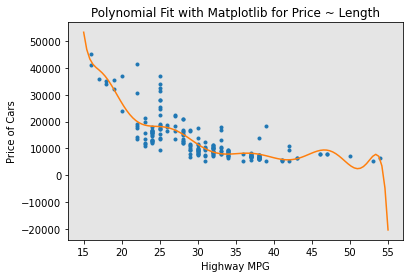

In [34]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# calculate polynomial
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

-->


<p>La expresión analítica para la función polinomial multivariable se complica. Por ejemplo, la expresión para un polinómio de segundo grado con dos variables sería:</p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


Podemos ejecutar una transformacion polinomial en multiples caracteristicas. Primero, importamos el módulo:


In [35]:
from sklearn.preprocessing import PolynomialFeatures

Generamos un objeto <b>PolynomialFeatures</b> de segundo grado:


In [36]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [37]:
Z_pr=pr.fit_transform(Z)

Los datos originales tienen 201 muestras y 4 caracteristicas


In [38]:
Z.shape

(201, 4)

Despues de la transformación existen 201 mustras y 15 caracteristicas


In [39]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


<p>El pipeline de datos facilita el procesamiento de estos. Usaremos el modulo <b>Pipeline</b> para crear un pipeline. Ademas se utilizará <b>StandardScaler</b> como paso para crearlo.</p>


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline haciendo una lista tuplas que incluyen el nombre del modelo o estimador y su constructor correspondiente.


In [41]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Introducimos la lista como argumento para el constructor del pipeline


In [42]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Podemos normalizar los datos ejecutando una transformación y ajustar el modelo al mismo tiempo.


In [43]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

De igual forma podemos normalizar los datos ejecutar una transformación y generar una predicción simultaneamente.


In [44]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta #5:</h1>
<b>Crear un pipeline que estandarice los datos, despues hacer una predicción usando un modelo de regresión lineal con las caracteristicas Z y objetivos Y</b>    
    </div>


In [45]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

</div>
Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

-->


<h2>Parte 4: Mediciones para Evaluación de Muestras</h2>


<p>Al evaluar nuestros modelos no solo queremos visualizar los resultados si no que queremos ademas una medición cuantitativa para determinar que tan preciso es el modelo.</p>

<p>Dos medidas muy importantes que a menudo se usan en estadística para determinar la precisión de un modelos son:</p>
<ul>
    <li><b>R^2 / R Cuadrada</b></li>
    <li><b>Error Cuadratico Medio (MSE)</b></li>

</ul>

<b>R Cuadrada</b>

<p>También conocido como coeficiente de determinación es una medida que indica que tan cerca estan los datos a la recta de regresión.</p>

<p>El valor de R Cuadrada es el porcentaje en la variación de la variable de respuesta (y) que es explicada por el modelo lineal.</p>

<b>Error Cuadratico Medio (MSE)</b>

<p>Mide el promedio de los cuadrados de los errores, esto es, la diferencia entre el valor actual (y) y el valor estimado (ŷ).</p>


<h3>Modelo 1: Regresión Lineal Simple</h3>


Calculemos R^2


In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Encontrar R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Podemos decir que el ~ 49.659% de la variación del precio se explica por este modelo lineal simple "horsepower_fit".


Calculemos el MSE


Podemos predecir la salida esto es, "yhat" utilizando el método predicho donde X es la variable de entrada:


In [47]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


Vamos a importar la función <b>mean_squared_error</b> desde el módulo <b>metrics</b>


In [48]:
from sklearn.metrics import mean_squared_error

Comparamos los resultados predichos con el actual


In [49]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.025174143


<h3>Modelo 2: Regresión Lineal Multiple</h3>


Calculemos R^2


In [50]:
# ajustar el modelo 
lm.fit(Z, df['price'])
# encontrar R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que el ~ 80.896 % de la variación del precio se explica por esta regresión lineal multiple "multi_fit".


Calculemos el MSE


 Generamos una preducción


In [51]:
Y_predict_multifit = lm.predict(Z)

Comparamos los resultados predichos con el actual


In [52]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Modelo 3: Ajuste Polinomial</h3>


Calculemos R^2


Importemos la función <b>r2_score</b> desde el módulo <b>metrics</b> ya que estamos usando una función distinta


In [53]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el valor de r^2


In [54]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Podemos decir que el ~ 67.419 % de la variación del precio se explica por el ajuste polinomial


<h3>MSE</h3>


También podemos calcular el MSE:  


In [55]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Parte 5: Predicción y Toma de Decisiones</h2>
<h3>Predicción</h3>

<p>En la sección anterior entrenamos el modelo con el método <b>fit</b>. Ahora usaremos el método <b>predict</b> para generar una predicción. Importemos <b>pyplot</b> para graficar; además usaremos algunas funciones de numpy.  </p>


In [56]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Generamos una nueva entrada


In [57]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Ajuste del modelo


In [58]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Generar una predicción


In [59]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

Podemos graficar los datos


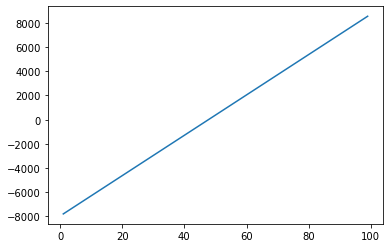

In [60]:
plt.plot(new_input, yhat)
plt.show()

<h3>Toma de Decisiones: Determinar un Buen Ajuste de Modelo</h3>


<p>Ahora que hemos visualizado distintos modelos y generado valores de R Cuadrada y MSE para los ajustes, ¿Como determinamos un buen ajuste de modelo?
<ul>
    <li><i>¿Cual es un buen valor de R Cuadrada?</i></li>
</ul>
</p>

<p>Al comparar modelos <b>el modelo con el valor R Cuadrada mas alto se ajusta mejor</b> a los datos.
    <ul>
    <li><i>¿Cual es un buen MSE?</i></li>
</ul>
</p>

<h4>Veamos los valores para distintos modelos</h4>
<p>Regresión Lineal Simple: Utlizando Highway-mpg como variable predictora del precio.
    <ul>
    <li>R-Cuadrada: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>

<p>Regresión Lineal Multiple: Utilizando las variables predictoras Horsepower, Curb-weight, Engine-size, and Highway-mpg de "Price".
<ul>
    <li>R-Cuadrada: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Ajuste Polinomial: Utilizando Highway-mpg como variable predictora de "Price".
<ul>
    <li>R-Cuadrada: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Modelo de Regresión Lineal Simple (SLR) vs Modelo de Regresión Lineal Multiple (MLR)</h3>


<p>Normalmente cuantas mas variables tenga mejor predicciones hara su modelo, pero esto no siempre es cierto. A veces quiza no tenga datos suficientes, tenga problemas numericos o muchas de las variables carecen de utilidad e incluso actuar como ruido. Como resultado, debería revisar siempre el MSE y R^2.</p>

<p>Asi que para ser capaces de comparar los resultados del modelo MLR vs el modelo SLR observamos la combinación de ambos, la R-Cuadrada y el MSE para tener la mejor conclusión respecto al ajuste del modelo.
<ul>
    <li><b>MSE</b>: El MSE del SLR es  3.16x10^7  mientras que el MLR tiene un MSE de 1.2 x10^7. El MSE del MLR es mucho menor.</li>
    <li><b>R-Cuadrada</b>: En este caso podemos observar que existe una gran diferencia entre la R-Cuadrada del SLR y la del MLR. La R-Cuadrada del SLR ((~0.497) es muy pequeña comparada con la del MLR (~0.809).
    </li>
</ul>
</p>

Esta R-Cuadrada en combinación con el MSE muestra que el MLR parece un mejor modelo en este caso comparado con el SLR.


<h3>Modelo Lineal Simple vs Ajuste Polinomial</h3>


<ul>
    <li><b>MSE</b>: Podemos observar que el ajuste polinomial arrastra al MSE debido a que este MSE es mas pequeño que el del SLR.</li> 
    <li><b>R-Cuadrada</b>: La R-Cuadrada para el ajuste polinomial es mayor que la R-Cuadrada para el SLR, asi que este eleva un poco la R-Cuadrada.</li>
</ul>
<p>Debido a que el ajuste polinomial resulta en un bajo MSE y un alta R-Cuadrada podemos concluir que este modelo se ajusta mejor que el de la regresión lineal simple para predecir "Price" con "Highway-mpg" como variable predictora.</p>


<h3>Regresión Lineal Multiple (MLR) vs Ajuste Polinomial</h3>


<ul>
    <li><b>MSE</b>: El MSE para el MLR es menor que el MSE para el ajuste polinomial.</li>
    <li><b>R-Cuadrada</b>: La R-Cuadrada para el MLR es también mucho mas largo que el ajuste polinomial.</li>
</ul>


<h2>Conclusión:</h2>


<p>Al comparar estos tres modelos concluimos que el <b>modelo MLR es el mejor</b> para predecir "price" desde la base de datos. Este resultado tiene sentido debido a que tenemos 27 variables en total y sabemos que mas de una de esas variables son predictores potenciales del precio final del coche.</p>


<h1>Thank you for completing this notebook</h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">

```
<p><a href="https://cocl.us/corsera_da0101en_notebook_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
```

</div>


<h3>Acerca de los Autores:</h3>

Este cuaderno fue escrito por <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan y <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> y <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> es un Cientifico de Datos en IBM que posee un Doctorado en Ingeniería Electrica. Su investigación se enfoca en el uso de Aprendizaje Automático, Procesamiento de Señales y Visión Artificial para determinar el impacto de los videos en la cognición. Joseph ha trabajado para IBM desde el término de su doctorado.
</p>


<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>
